In [113]:
import sqlite3 as sql
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('spam.csv',encoding = "latin-1")

In [115]:
df = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'Target', 'v2' : 'TextSMS'})

In [116]:
df.describe()

,Target,TextSMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Target   5572 non-null   object
 1   TextSMS  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [118]:
df.columns

Index(['Target', 'TextSMS'], dtype='object')

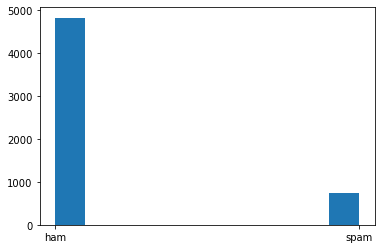

In [119]:
plt.hist(df['Target'])
plt.show() 

In [120]:
df

,Target,TextSMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [121]:
df.duplicated().value_counts()

False    5169
True      403
dtype: int64

In [122]:
df = df.drop_duplicates()

In [123]:
df.duplicated().value_counts()

False    5169
dtype: int64

In [124]:
df['WordsInSMS'] = df['TextSMS'].apply(lambda x: len(x.split(" ")))

<ipython-input-124-848f217d61ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WordsInSMS'] = df['TextSMS'].apply(lambda x: len(x.split(" ")))


In [125]:
df

,Target,TextSMS,WordsInSMS
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30
5568,ham,Will Ì_ b going to esplanade fr home?,8
5569,ham,"Pity, * was in mood for that. So...any other s...",10
5570,ham,The guy did some bitching but I acted like i'd...,26


In [126]:
df['LengthInSMS'] = df['TextSMS'].str.len()

<ipython-input-126-0dc651529053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LengthInSMS'] = df['TextSMS'].str.len()


In [127]:
df

,Target,TextSMS,WordsInSMS,LengthInSMS
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,161
5568,ham,Will Ì_ b going to esplanade fr home?,8,37
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57
5570,ham,The guy did some bitching but I acted like i'd...,26,125


In [128]:
# df['MajInSMS'] = sum(1 for x in df['TextSMS'] if x.isupper())
df['MajInSMS'] = df['TextSMS'].str.findall(r'[A-Z]').str.len()

<ipython-input-128-02721f96637a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MajInSMS'] = df['TextSMS'].str.findall(r'[A-Z]').str.len()


In [129]:
df

,Target,TextSMS,WordsInSMS,LengthInSMS,MajInSMS
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,3
1,ham,Ok lar... Joking wif u oni...,6,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,10
3,ham,U dun say so early hor... U c already then say...,11,49,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,161,9
5568,ham,Will Ì_ b going to esplanade fr home?,8,37,1
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57,2
5570,ham,The guy did some bitching but I acted like i'd...,26,125,2


In [130]:
df['MinInSMS'] = df['TextSMS'].str.findall(r'[a-z]').str.len()

<ipython-input-130-3239c5cc8992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MinInSMS'] = df['TextSMS'].str.findall(r'[a-z]').str.len()


In [148]:
df

,Target,TextSMS,WordsInSMS,LengthInSMS,MajInSMS,MinInSMS,phone_number
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,3,80,NaN
1,ham,Ok lar... Joking wif u oni...,6,29,2,16,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,10,87,21
3,ham,U dun say so early hor... U c already then say...,11,49,2,31,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,2,45,NaN
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,161,9,92,75
5568,ham,Will Ì_ b going to esplanade fr home?,8,37,1,26,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57,2,39,NaN
5570,ham,The guy did some bitching but I acted like i'd...,26,125,2,97,NaN


In [140]:
df['phone_number'] = df['TextSMS'].str.extract('(\d{2})')

<ipython-input-140-6ce6a00ada79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phone_number'] = df['TextSMS'].str.extract('(\d{2})')


In [158]:
df[df['phone_number'].notna()].value_counts(df['Target']=='spam')


Target
True     580
False     97
dtype: int64

C:\Users\nolis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'le rapport ham/spam quand il y a au mois 2 chiffres de suites')

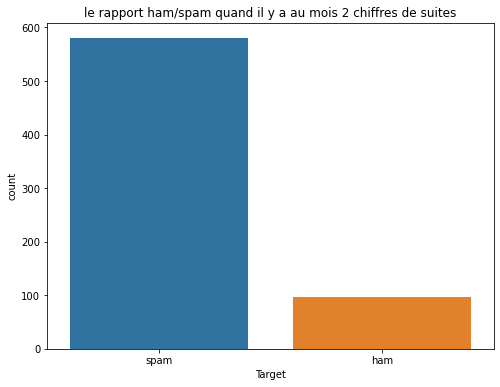

In [163]:
df1 = df[df['phone_number'].notna()]

plt.figure(figsize=(8,6), )
sns.countplot(df1['Target']).set_title('le rapport ham/spam quand il y a au mois 2 chiffres de suites')

In [142]:
df.describe(include='all')

,Target,TextSMS,WordsInSMS,LengthInSMS,MajInSMS,MinInSMS,phone_number
count,5169,5169,5169.000000,5169.000000,5169.000000,5169.000000,677
unique,2,5169,NaN,NaN,NaN,NaN,81
top,ham,I wanna watch that movie,NaN,NaN,NaN,NaN,10
freq,4516,1,NaN,NaN,NaN,NaN,71
mean,NaN,NaN,15.455988,78.977945,5.266009,52.750435,NaN
std,NaN,NaN,11.163853,58.236293,11.153492,40.300953,NaN
min,NaN,NaN,1.000000,2.000000,0.000000,0.000000,NaN
25%,NaN,NaN,7.000000,36.000000,1.000000,24.000000,NaN
50%,NaN,NaN,12.000000,60.000000,2.000000,42.000000,NaN
75%,NaN,NaN,22.000000,117.000000,4.000000,74.000000,NaN


In [167]:
df2 = df.groupby('Target').mean()
df2

,WordsInSMS,LengthInSMS,MajInSMS,MinInSMS
Target,,,,
ham,14.259743,70.459256,3.825066,49.101196
spam,23.728943,137.891271,15.231240,77.987749
